<a href="https://colab.research.google.com/github/mevangelista-alvarado/neural_networks/blob/main/RedNeuronalRecurrente_Ejemplo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

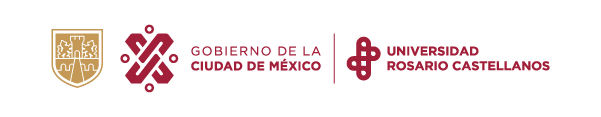

## Introducción

En este ejemplo, construiremos una red neuronal recurrente (RNN) para predecir la siguiente palabra en una secuencia de palabras en un enfoque de procesamiento de lenguaje natural (NLP).

## Implementación en Python

__Importación de Bibliotecas__

Importamos los módulos necesarios

In [ ]:
import tensorflow as tf
import numpy as np

__Datos de Entrenamiento__

Definimos los datos de entrenamiento, que es una cadena de texto.

In [ ]:
# Datos de entrenamiento
text = "Hola, ¿cómo estás? Soy una red neuronal recurrente simple. Hago predicción de secuencias de palabras."

Obtenemos todas las palabras de nuestro texto

In [ ]:
words = text.split()

Definimos dos diccionarios de la siguiente manera

*   Diccionario 1:  
    `{"index": "word"}`
*   Diccionario 1:  
    `{"word": "index"}`

que mapean cada palabra única a un índice y viceversa.

Esto es útil para convertir palabras en números enteros y viceversa.

In [ ]:
# Tokenizacion
word_to_idx = {word: idx for idx, word in enumerate(words)}
idx_to_word = {idx: word for idx, word in enumerate(words)}

__Preparación de Datos de Entrada y Salida__

In [ ]:
seq_length = 3 # Puedes cambir por otro numero, por ejemplo 5.
X = []
y = []

for i in range(len(words) - seq_length):
    seq_in = words[i:i + seq_length]
    seq_out = words[i + seq_length]
    X.append([word_to_idx[word] for word in seq_in])
    y.append(word_to_idx[seq_out])

X = np.array(X)
y = np.array(y)

Establecemos `seq_length` en `3`, lo que significa que vamos a tomar secuencias de 3 caracteres como entrada y tratar de predecir el siguiente carácter.  

Creamos dos listas, `X` e `y`, donde `X` contendrá las secuencias de entrada codificadas como números enteros e `y` contendrá las palabras de destino codificados de la misma manera.

Luego, convertimos estas listas en matrices `NumPy` para facilitar el procesamiento.

__Creación del Modelo RNN__

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(words), 10, input_length=seq_length),
    tf.keras.layers.SimpleRNN(32, activation='tanh', input_shape=(seq_length, 10)),
    tf.keras.layers.Dense(len(words), activation='softmax')
])

Creamos el modelo de RNN utilizando el módulo de Keras de TensorFlow. El modelo consta de dos capas:

*   Una capa `Embedding` que se utiliza para mapear las palabras en vectores de números reales.   
*   Una capa `SimpleRNN` con $32$ unidades, que toma una secuencia de longitud `seq_length` y utiliza la función de activación tangente hiperbólica (`tanh`).
*   Una capa `Dense` con un número de unidades igual al número de caracteres únicos en el texto, y utiliza la función de activación `softmax`.




En resumen, el modelo consta de tres capas:

* Una capa de incrustación que convierte las palabras en vectores de incrustación.
* Una capa RNN que procesa las secuencias de vectores de incrustación.
* Una capa de salida que predice la palabra siguiente en función de la salida de la capa RNN.



__Compilación del Modelo__

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

Definimos la función de pérdida como 'sparse_categorical_crossentropy', que se utiliza para problemas de clasificación de varias clases.  

Y configuramos el optimizador 'adam' para ajustar los pesos durante el entrenamiento.

__Entrenamiento del Modelo__

In [ ]:
model.fit(X, y, epochs=100)

Entrenamos el modelo RNN utilizando los datos de entrada `X` y las etiquetas `y` durante $100$ épocas.  

El modelo aprenderá a predecir el siguiente carácter en una secuencia basándose en los patrones en los datos de entrenamiento.

__Generación de Texto__

Generamos texto utilizando el modelo entrenado.

In [ ]:
# Generación de secuencia de palabras
seed_text = "Soy una red"
seed_words = seed_text.split()
generated_words = list(seed_words)

for _ in range(2):
    x = np.array([[word_to_idx[word] for word in seed_words]])
    y_pred = model.predict(x)
    next_word_idx = np.argmax(y_pred)
    next_word = idx_to_word[next_word_idx]
    generated_words.append(next_word)
    seed_words = seed_words[1:] + [next_word]

generated_text = ' '.join(generated_words)
print(generated_text)

Comenzamos con una "semilla" (`seed_text`) y, en un bucle, predecimos la siguiente palabra en función de la semilla.

Luego, agregamos el carácter predicho a la semilla y repetimos el proceso $2$ veces para generar un texto con dos palabras al texto original.  

**Remark**.  

El modelo utiliza las probabilidades de salida de la capa softmax para hacer predicciones.  


La longitud de la variable `seed_text` debe de ser igual a la definida en la variable `seq_length`para evitar errores.